In [5]:
# Importing necessary libraries for data manipulation and linear algebra
import pandas as pd  # For handling data
import numpy as np   # For numerical operations

In [6]:

# Settinging display options for easier data viewing
pd.set_option('display.max_columns', 100)

In [7]:
# Importing machine learning models and utilities from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [8]:

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setting a visual theme for seaborn for consistent visualizations
sns.set_style('whitegrid')

In [9]:

# loading data from a specified path
data_path = "/content/data (1).csv"
cancer_data = pd.read_csv(data_path)

In [10]:
# Brief exploration to understand the dataset's structure
print("Dataset dimensions:", cancer_data.shape)
print("First few rows of the dataset:")
print(cancer_data.head())

Dataset dimensions: (569, 33)
First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

 

In [11]:

# Exploratory Data Analysis (EDA) - Checking for missing values
missing_values = cancer_data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_

In [12]:

# Dropping columns with missing values
cancer_data_cleaned = cancer_data.dropna(axis=1)
print("Data after removing columns with missing values:", cancer_data_cleaned.shape)

Data after removing columns with missing values: (569, 32)


In [13]:
 #Converting categorical data to numeric for analysis
le = LabelEncoder()
cancer_data_cleaned['diagnosis'] = le.fit_transform(cancer_data_cleaned['diagnosis'])

<ipython-input-13-c238d3200418>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_data_cleaned['diagnosis'] = le.fit_transform(cancer_data_cleaned['diagnosis'])


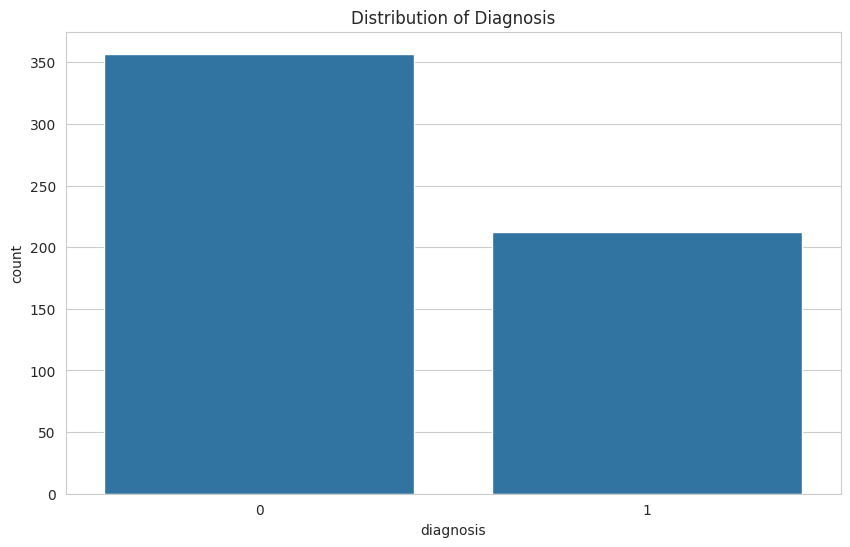

In [14]:
# Visualization of data to understand distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=cancer_data_cleaned)
plt.title("Distribution of Diagnosis")
plt.show()

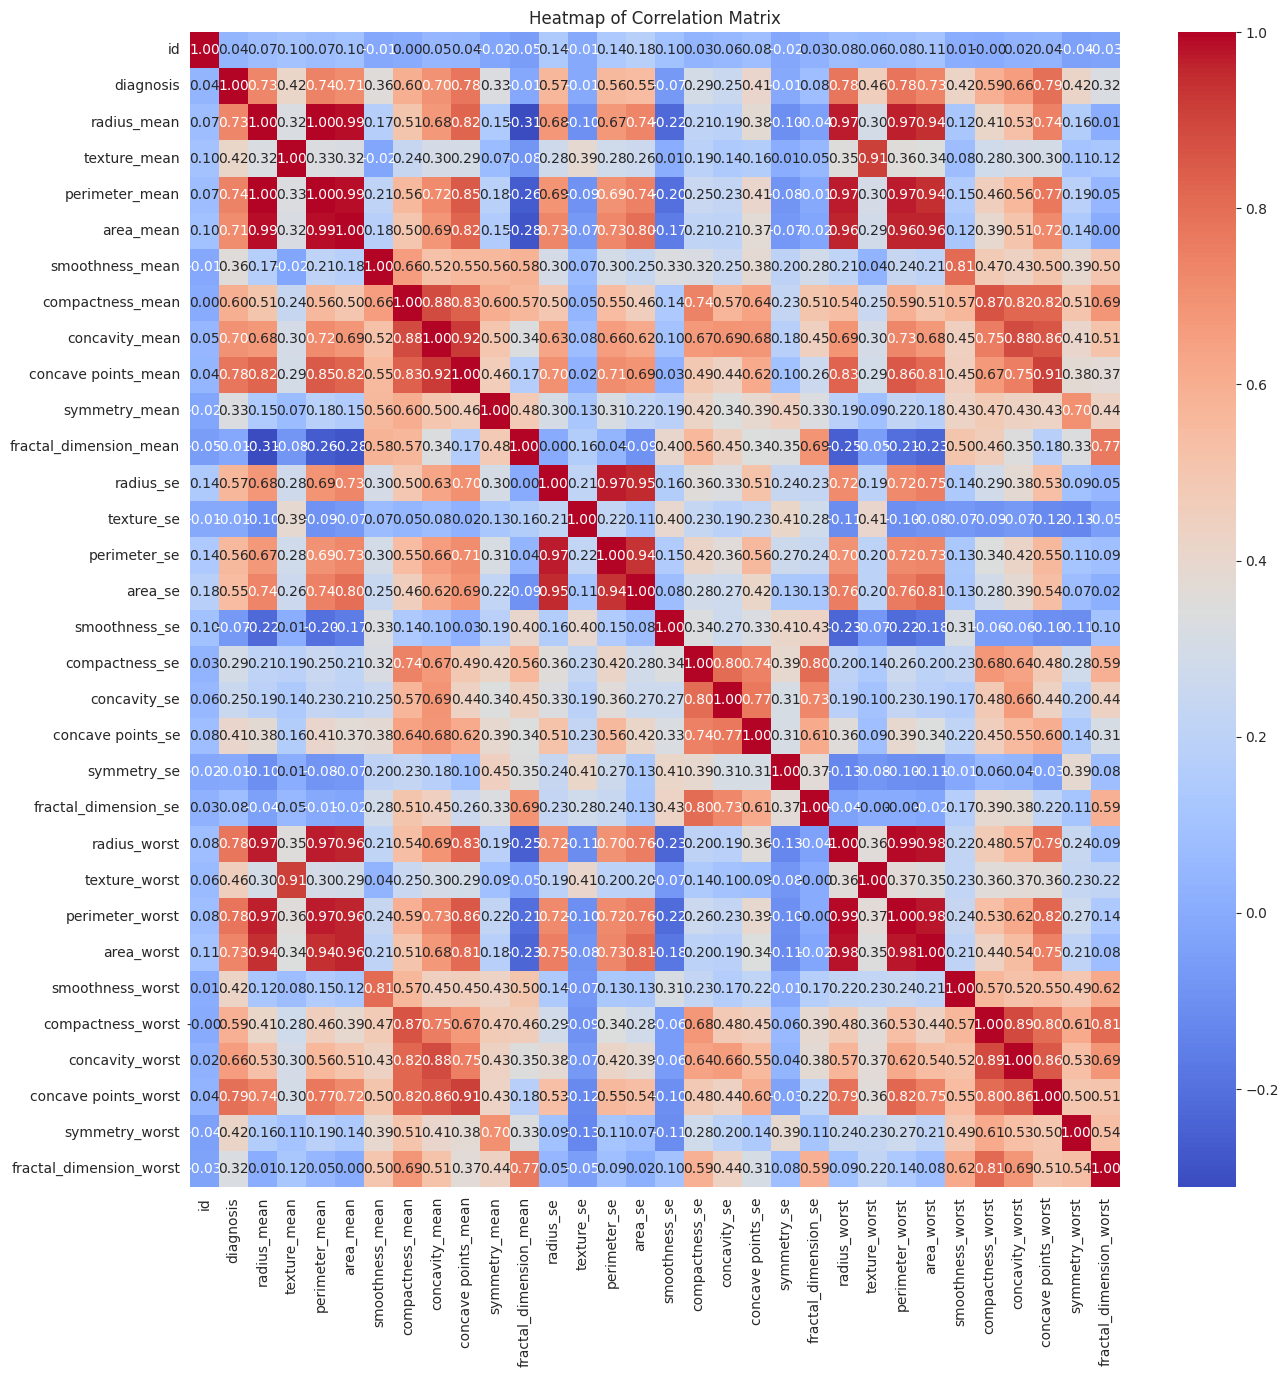

In [15]:
#  Heatmap of Correlation Matrix
corr_matrix = cancer_data_cleaned.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [16]:
# Splitting data into training and testing sets
X = cancer_data_cleaned.drop('diagnosis', axis=1)
y = cancer_data_cleaned['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:

# Feature scaling for improved model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy*100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    # Additional Visualization: ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Logistic Regression Results:
Accuracy: 98.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



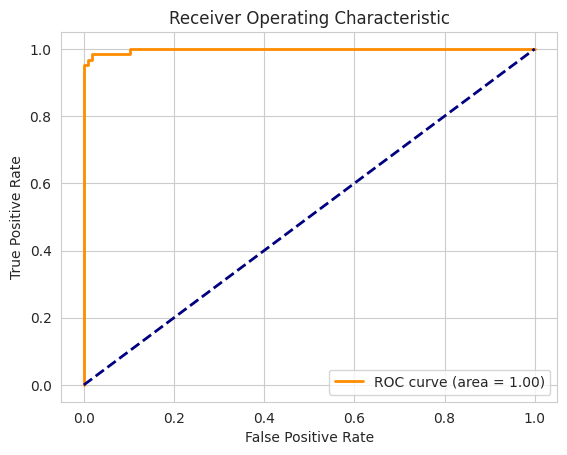

In [19]:


# Training and evaluating a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
print("Logistic Regression Results:")
train_evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)


# Additional models can be trained and evaluated using the same process


In [20]:
# using different models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True), # probability parameter set to True for ROC curve compatibility
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

Evaluating model: Decision Tree
Accuracy: 92.98%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       108
           1       0.87      0.95      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



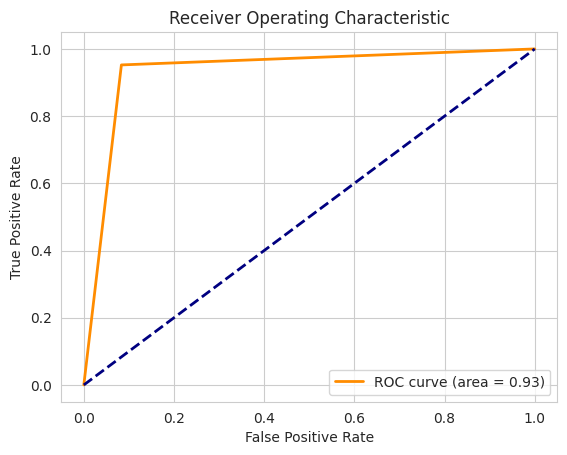

Evaluating model: Random Forest
Accuracy: 97.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



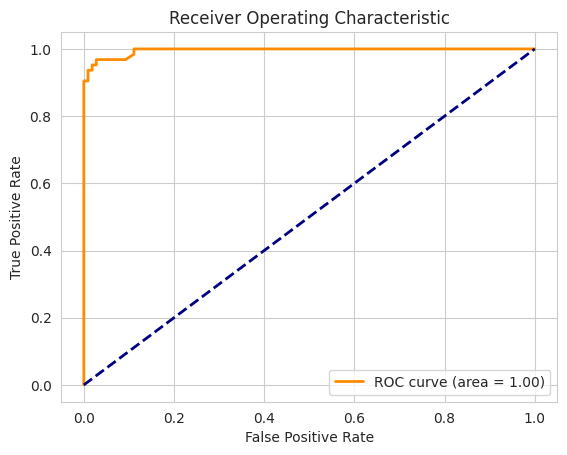

Evaluating model: Support Vector Machine
Accuracy: 97.66%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



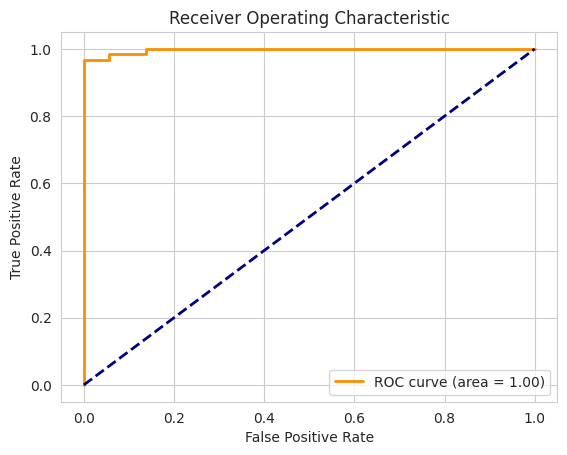

Evaluating model: K-Nearest Neighbors
Accuracy: 95.91%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



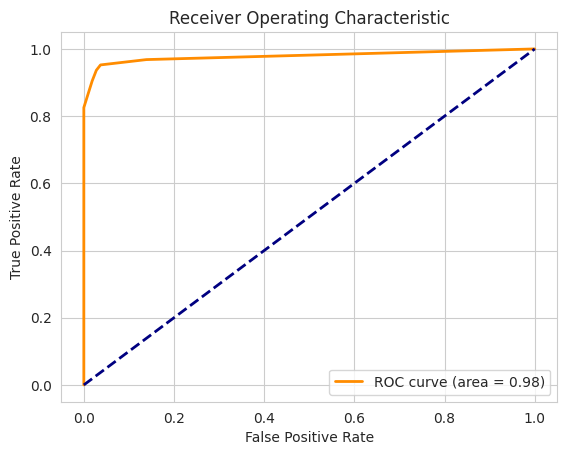

In [21]:
# Evaluating multiple models to find the best performer
for name, model in models.items():
    print(f"Evaluating model: {name}")
    train_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

In [22]:

# Hyperparameter tuning for the best model (example with Random Forest)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [23]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters found by grid search:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters found by grid search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}


Evaluation of the best Random Forest model after hyperparameter tuning:
Accuracy: 96.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



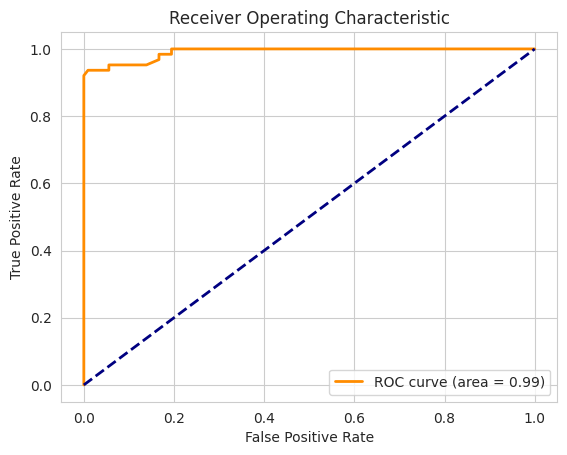

In [24]:
# Re-evaluating the best model after hyperparameter tuning
print("Evaluation of the best Random Forest model after hyperparameter tuning:")
train_evaluate_model(best_rf_model, X_train_scaled, X_test_scaled, y_train, y_test)

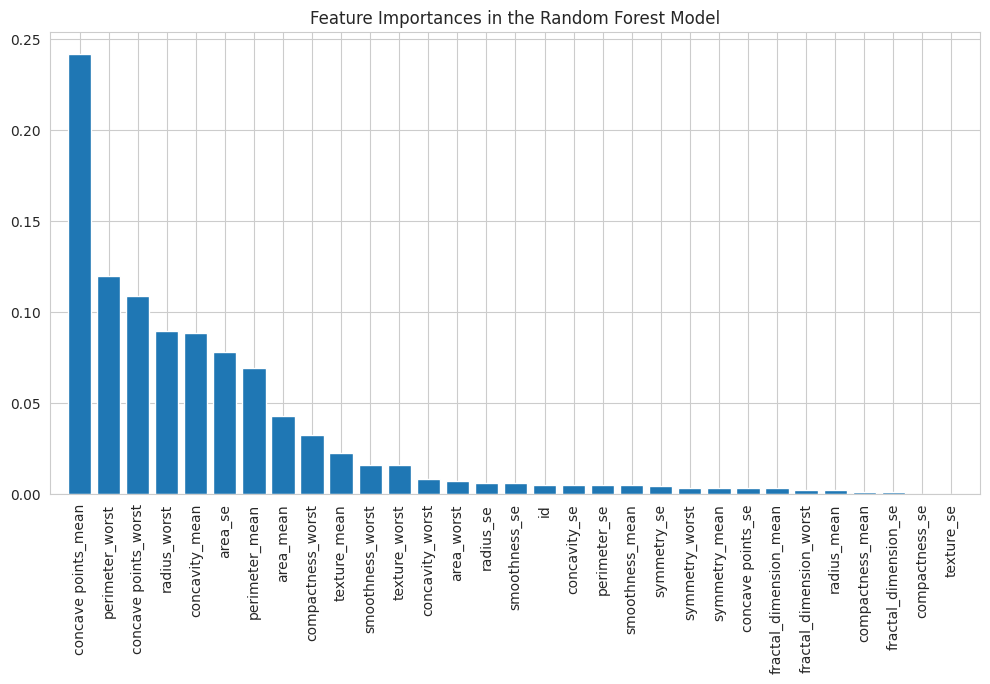

In [25]:
# Visualization of Feature Importances
feature_importances = best_rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances in the Random Forest Model")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [26]:


# Model deployment preparation
import pickle

# Saving the trained model to a file for later use
model_filename = 'best_rf_model.pkl'
pickle.dump(best_rf_model, open(model_filename, 'wb'))

print(f"Model saved to {model_filename}")

# Example of loading the model
loaded_model = pickle.load(open(model_filename, 'rb'))
# Verifying the model by using it for prediction on test data
loaded_model_score = loaded_model.score(X_test_scaled, y_test)
print(f"Loaded model accuracy: {loaded_model_score*100:.2f}%")

Model saved to best_rf_model.pkl
Loaded model accuracy: 96.49%
